### Data Set Information:

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school-related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. 

Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details).

Attribute Information:
1) school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2) sex - student's sex (binary: 'F' - female or 'M' - male)
3) age - student's age (numeric: from 15 to 22)
4) address - student's home address type (binary: 'U' - urban or 'R' - rural)
5) famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6) Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7) Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary      education or 4 â€“ higher education)
8) Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
9) Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10) Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11) reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12) guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13) traveltime - home to school travel time (numeric: 1 - 1 hour)
14) studytime - weekly study time (numeric: 1 - 10 hours)
15) failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16) schoolsup - extra educational support (binary: yes or no)
17) famsup - family educational support (binary: yes or no)
18) paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19) activities - extra-curricular activities (binary: yes or no)
20) nursery - attended nursery school (binary: yes or no)
21) higher - wants to take higher education (binary: yes or no)
22) internet - Internet access at home (binary: yes or no)
22) romantic - with a romantic relationship (binary: yes or no)
23) famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
24) freetime - free time after school (numeric: from 1 - very low to 5 - very high)
25) goout - going out with friends (numeric: from 1 - very low to 5 - very high)
26) Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
27) Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
28) health - current health status (numeric: from 1 - very bad to 5 - very good)
29) absences - number of school absences (numeric: from 0 to 93)

these grades are related with the course subject, Math or Portuguese:
1) G1 - first period grade (numeric: from 0 to 20)
2) G2 - second period grade (numeric: from 0 to 20)
3) G3 - final grade (numeric: from 0 to 20, output target)

Relevant Papers:
Citation:
P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.

### Importing all the required libraries.

In [102]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

Using pandas function read_csv() to read data file.

In [103]:
students = pd.read_csv(r'F:\dataset\student-mat.csv')
students.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [104]:
students.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [105]:
students.shape

(395, 33)

In [106]:
students.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


Now we have to check if we have any missing values in the columns. If we encounter any then we can impute them.

In [107]:
students.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

We can see that there are zero missing values so no need of data imputation. 

In [108]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

We see that there two types of datatypes in dataset ie object and int. we can segregate columns according to there datatypes.

In [109]:
obj = [col for col in students.columns if students[col].dtype=='object']
print(obj)

['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


In [110]:
integer = [col for col in students.columns if students[col].dtype=='int64']
print(integer)

['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


Let's find out the correlation of the features with respect to G3 column. this will give an idea which factors have impacts on the final score more.

In [111]:
correlation = students.corr()

In [112]:
correlation.G3

age          -0.161579
Medu          0.217147
Fedu          0.152457
traveltime   -0.117142
studytime     0.097820
failures     -0.360415
famrel        0.051363
freetime      0.011307
goout        -0.132791
Dalc         -0.054660
Walc         -0.051939
health       -0.061335
absences      0.034247
G1            0.801468
G2            0.904868
G3            1.000000
Name: G3, dtype: float64

We can notice that G1, G2 stronger positive correlation with G3 while age, traveltime, failures, goout have stronger negative correlation than others with G3. while those closer to 0 the correlation, the weaker the connection. Let's plot the heatmap now for visualization.

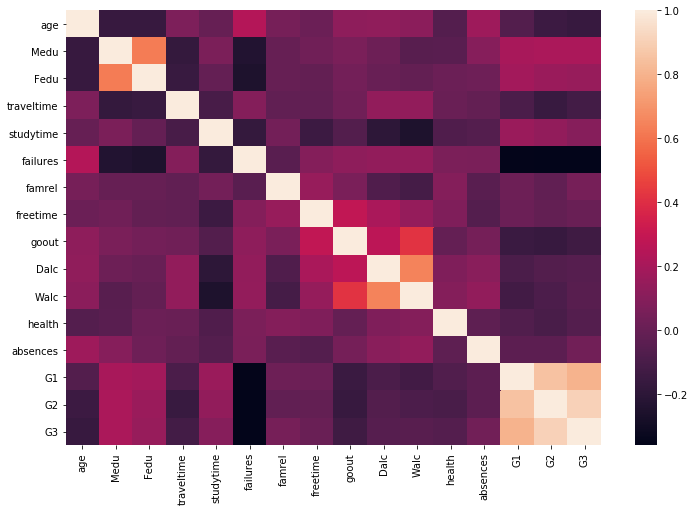

In [113]:
plt.figure(figsize=(12,8))
sb.heatmap(correlation)
plt.show()

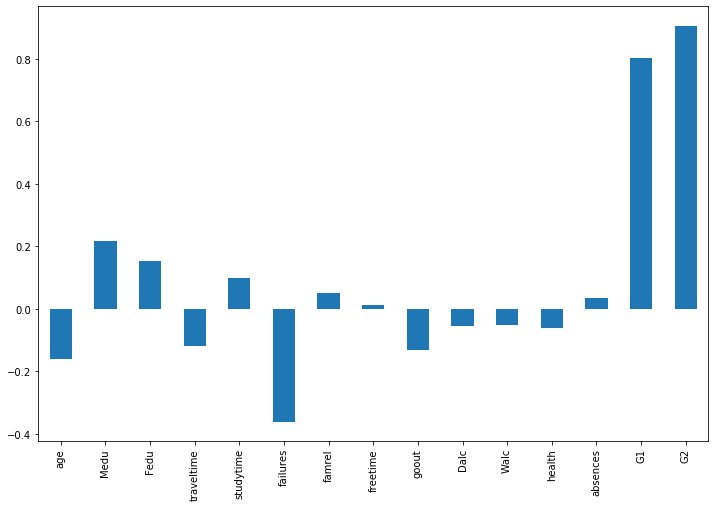

In [114]:
plt.figure(figsize=(12,8))
students.corr()['G3'][['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime',
                       'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']].plot.bar()


The gender and guardian feature is encoded to integer.

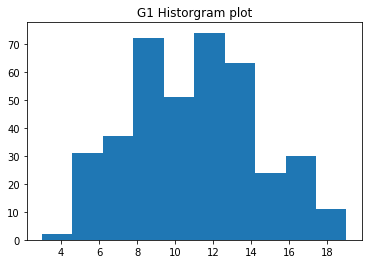

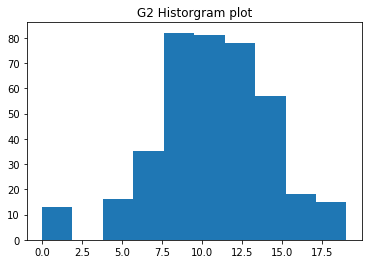

In [115]:
plot = ['G1', 'G2']
for i in plot:
    plt.title(i + " Historgram plot")
    plt.hist(students[i])
    plt.show()

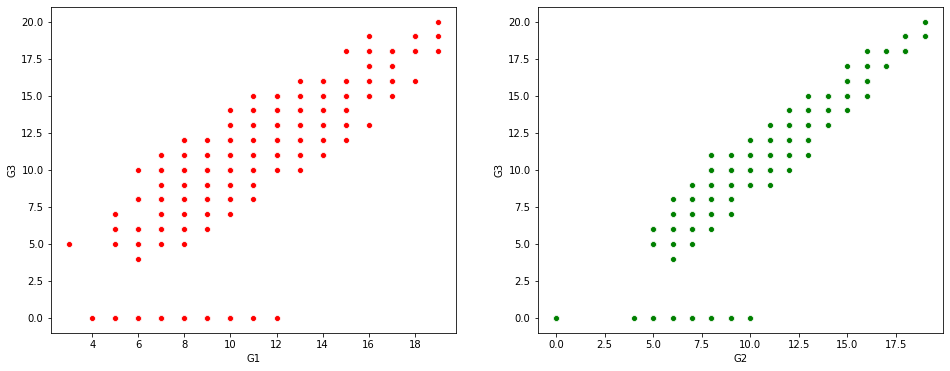

In [116]:
plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
sb.scatterplot(students['G1'], students['G3'], color='r')
plt.subplot(1, 2, 2)
sb.scatterplot(students['G2'], students['G3'], color='g')
plt.show()

Plotting the scatterplot of G1 and G2 against G3 we found that they are linearly correlated.

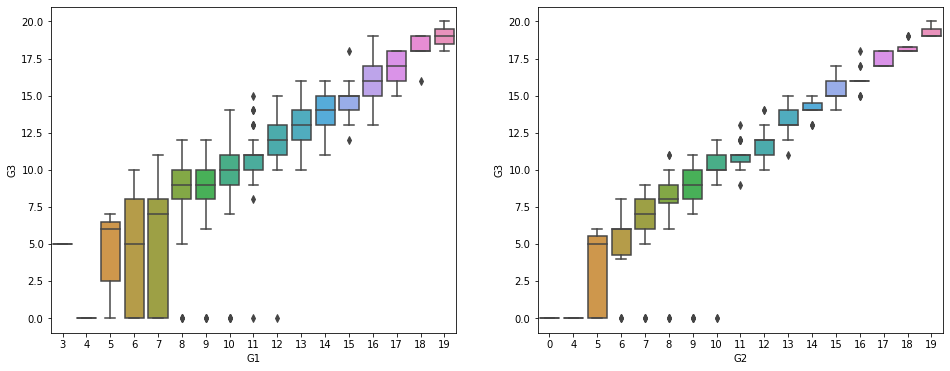

In [117]:
plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
sb.boxplot(students['G1'], students['G3'])
plt.subplot(1, 2, 2)
sb.boxplot(students['G2'], students['G3'])
plt.show()

The gender and guardian feature is encoded to integer.

In [118]:
f={
    'F':1,
    'M':0
    }
students['sex'] = students['sex'].map(f)

In [119]:
d={
    'mother':0,
    'father':1,
    'other':2
    }
students['guardian'] = students['guardian'].map(d)

Choosing the independent and dependent variables for performing linear regression.

In [120]:
x = students[['age', 'sex', 'Medu', 'Fedu', 'guardian',  'failures',
               'freetime', 'goout', 'G1', 'G2']]
x.head()

,age,sex,Medu,Fedu,guardian,failures,freetime,goout,G1,G2
0,18,1,4,4,0,0,3,4,5,6
1,17,1,1,1,1,0,3,3,5,5
2,15,1,1,1,0,3,3,2,7,8
3,15,1,4,2,0,0,2,2,15,14
4,16,1,3,3,1,0,3,2,6,10


In [121]:
y = students['G3']
y.head()

0     6
1     6
2    10
3    15
4    10
Name: G3, dtype: int64

In [122]:
x.shape, y.shape

((395, 10), (395,))

The dataset is splitted into 70% training set and 30% validation set. Before training the data we will be using feature scaling.

In [123]:
# function to calculate train errors.
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(x)

xtrain, xtest, ytrain, ytest = train_test_split(X_scaled, y, test_size=0.3)
    
lr = LinearRegression()

Calculating the errors and other metrics

In [124]:
lr.fit(xtest, ytest)
yhat = lr.predict(xtest)
accuracy = lr.score(xtest, ytest)*100
mae = mean_absolute_error(ytest, yhat)
mse = mean_squared_error(ytest, yhat)
rmse = math.sqrt(mse)
r2 = r2_score(ytest, yhat)

In [125]:
print("Accuracy :", accuracy)
print("Mean Absolute Error :", mae)
print("Mean Squared Error :", mse)
print("Root Mean Squared Error :", rmse)
print("R-Squared Error :", r2)

Accuracy : 78.9945418559822
Mean Absolute Error : 1.2740970767884838
Mean Squared Error : 3.9831902234398
Root Mean Squared Error : 1.9957931314241464
R-Squared Error : 0.789945418559822


In [126]:
print("-------------------------")
print('Coefficient/Slope: \n', lr.coef_)
print("-------------------------")
print('Intercept: \n', lr.intercept_)
print("-------------------------")

-------------------------
Coefficient/Slope: 
 [-0.26825805 -0.49469879  0.46186798 -0.31442201  0.28157374 -0.20113187
 -0.13359003  0.17676913  0.33150897  3.69098595]
-------------------------
Intercept: 
 10.396146312543957
-------------------------


Feature: 0, Score : -0.26826
Feature: 1, Score : -0.49470
Feature: 2, Score : 0.46187
Feature: 3, Score : -0.31442
Feature: 4, Score : 0.28157
Feature: 5, Score : -0.20113
Feature: 6, Score : -0.13359
Feature: 7, Score : 0.17677
Feature: 8, Score : 0.33151
Feature: 9, Score : 3.69099


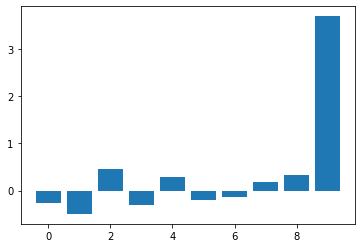

In [127]:
for i, v in enumerate(lr.coef_):
    print('Feature: %0d, Score : %.5f' % (i,v))
    
plt.bar([x for x in range(len(lr.coef_))], lr.coef_)
plt.show()

Below is the graph of actual vs. predicted scores

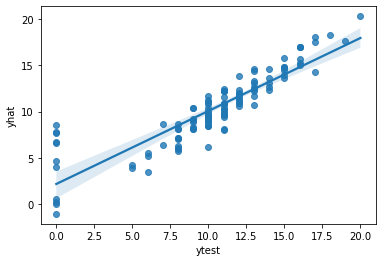

In [128]:
sb.regplot(ytest, yhat)
plt.xlabel('ytest')
plt.ylabel('yhat')
plt.show()

In [129]:
res = pd.DataFrame(x.columns, columns=['Features'])
res['Weights'] = lr.coef_
res

,Features,Weights
0,age,-0.268258
1,sex,-0.494699
2,Medu,0.461868
3,Fedu,-0.314422
4,guardian,0.281574
5,failures,-0.201132
6,freetime,-0.133590
7,goout,0.176769
8,G1,0.331509
9,G2,3.690986


Printing the predicted score.

In [130]:
df = pd.DataFrame(yhat, columns = ['Predict_Score'])
df.head()

,Predict_Score
0,8.169723
1,12.343930
2,9.121265
3,9.439161
4,10.818140


Below is the table for the predicted score and actual score

In [131]:
ytest = ytest.reset_index(drop=True)
df['Actual_Score'] = ytest
df.head()

,Predict_Score,Actual_Score
0,8.169723,8
1,12.343930,12
2,9.121265,10
3,9.439161,10
4,10.818140,11


Let's calculate the difference between the predicted and actual scores.

In [132]:
df['Difference'] = df['Predict_Score'] - df['Actual_Score']
df.head()

,Predict_Score,Actual_Score,Difference
0,8.169723,8,0.169723
1,12.343930,12,0.343930
2,9.121265,10,-0.878735
3,9.439161,10,-0.560839
4,10.818140,11,-0.181860
